<a href="https://colab.research.google.com/github/Deb052024/Machine-Prediction/blob/main/Mobile_Handset_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
!pip install -q ray==2.10.0
!pip3 install -q autogluon.tabular


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
df=pd.read_excel('/content/Processed_Flipdata.xlsx')

In [4]:
#info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [5]:
#Null value check
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [6]:
#EDA on the data set
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [7]:
#Duplicate Value check
df.duplicated().sum()

0

In [8]:
#Renaming Prize Column to Price
df.rename(columns={'Prize':'Price'},inplace=True)

In [9]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [10]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')

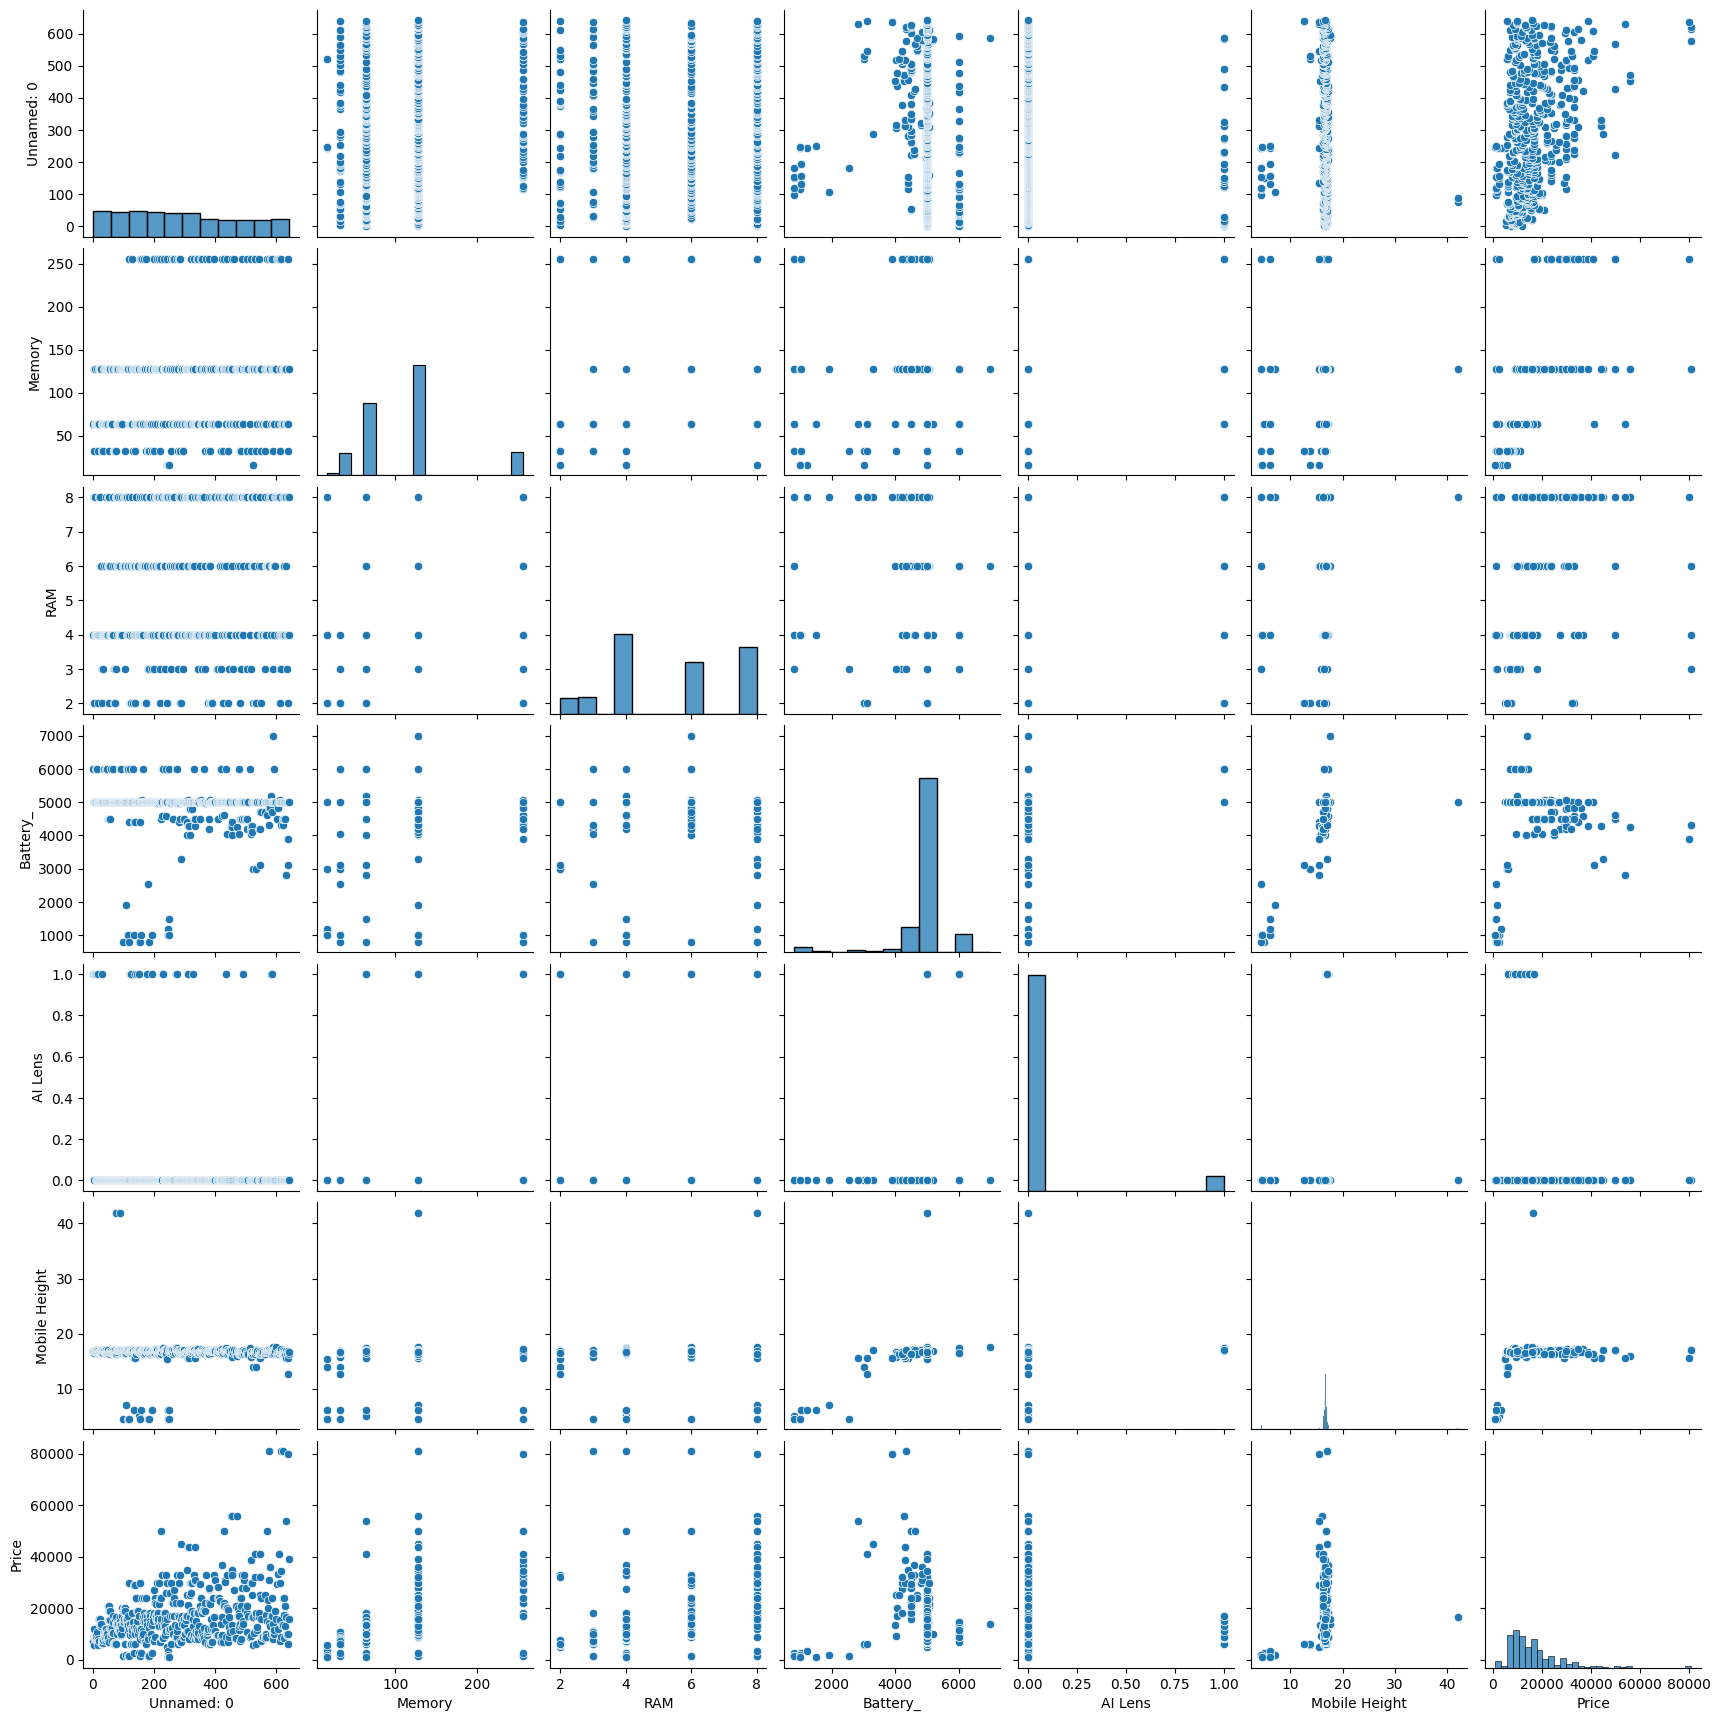

In [11]:
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [12]:
categorical_col=df[['Model','Colour','Rear Camera','Front Camera','Processor_']]
categorical_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [13]:
df['Model'].value_counts()

#df['Type Of Dwell'].value_counts().plot(kind='bar')

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
...,...
vivo Y1s,1
OnePlus Nord,1
Micromax 3,1


In [15]:
df_final=df.drop(['Unnamed: 0'],axis=1)
#Dropping unnecessary column from Analysis and puttingrest into df_final dataFrame

In [16]:
#Feature Values count,extraction and special attributes in Feature TreatMent
counter=3
def feature(df,columns,counter):
  for column in columns:
    feature_counts=df[column].value_counts()
    other_categories=feature_counts[feature_counts<counter].index
    df[column]=df[column].where(~df[column].isin(other_categories),'Lesser')

feature(df_final,categorical_col,counter)

# Optional: Print value counts for each column
for column in categorical_col:
    print(f"Value counts for {column}:")
    print(df_final[column].value_counts())
    print("\n")

Value counts for Model:
Model
Lesser                   144
SAMSUNG Galaxy A14 5G      9
REDMI Note 12 Pro 5G       9
vivo Y16                   9
realme C55                 9
                        ... 
realme Narzo 50            3
MOTOROLA g52               3
OPPO A17k                  3
realme 9 Pro+ 5G           3
vivo V25 Pro 5G            3
Name: count, Length: 89, dtype: int64


Value counts for Colour:
Colour
Lesser              295
Yellow               12
Power Black           8
Royal Blue            8
Black                 8
Midnight Black        7
Cool Blue             7
Aqua Blue             6
Glacier Blue          6
Force Black           6
Blue                  5
M3)                   5
Racing Black          5
OMG Black             5
Nebula Blue           5
Carbon Black          5
Light Green           5
Hyperspace            4
Light Silver          4
Horizon Blue          4
Dark Blue             4
Marine Blue           4
Light Blue            4
Night Sea             4
Pac

In [17]:
df_final['Model'].value_counts(['Lesser'])
#df['fuel_type'].isnull().value_counts()/len(df['fuel_type'])*100

,proportion
Model,
Lesser,0.266174
SAMSUNG Galaxy A14 5G,0.016636
REDMI Note 12 Pro 5G,0.016636
vivo Y16,0.016636
realme C55,0.016636
...,...
realme Narzo 50,0.005545
MOTOROLA g52,0.005545
OPPO A17k,0.005545


In [18]:
for column in categorical_col:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()
    #Print the unique values in the categorical columns

Unique values in 'Model':
['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'mic

In [19]:
df.groupby(['Model','Colour'])['Price'].mean().sort_values(ascending=False)
#Model and Colour wise grouping and Price Display

Model                  Colour       
APPLE iPhone 14 Plus   Midnight         80999.0
                       Purple           80999.0
                       Starlight        80999.0
SAMSUNG Galaxy S23 5G  Cream            79999.0
Google Pixel 7         Lemongrass       55999.0
                                         ...   
micromax               Light Silver      1375.0
micromax 2             Nebula Green      1299.0
micromax 1             Eclipse Black     1299.0
micromax               Lake Blue         1199.0
redmi min              M3)                920.0
Name: Price, Length: 386, dtype: float64

In [20]:
df.groupby(['Model','Rear Camera'])['Price'].mean().sort_values(ascending=False).head(30)

,,Price
Model,Rear Camera,
APPLE iPhone 14 Plus,12MP,80999.000000
SAMSUNG Galaxy S23 5G,50MP,79999.000000
Google Pixel 7,50MP,55999.000000
APPLE iPhone 12,12MP,53999.000000
MOTOROLA Edge 30 Ultra,200MP,49999.000000
SAMSUNG Galaxy S22 Plus 5G,50MP,49999.000000
SAMSUNG Galaxy Z Flip3 5G,12MP,44999.000000
Google Pixel 7a,64MP,43999.000000
APPLE iPhone 11,12MP,41199.000000


In [ ]:
df_final.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

In [21]:
numerical_col=df_final[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]
numerical_col

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...
536,256,8,3900,0,15.49,79999
537,32,2,3100,0,12.70,5998
538,64,4,5000,0,16.76,9990
539,128,8,5000,0,16.26,38999


<Axes: >

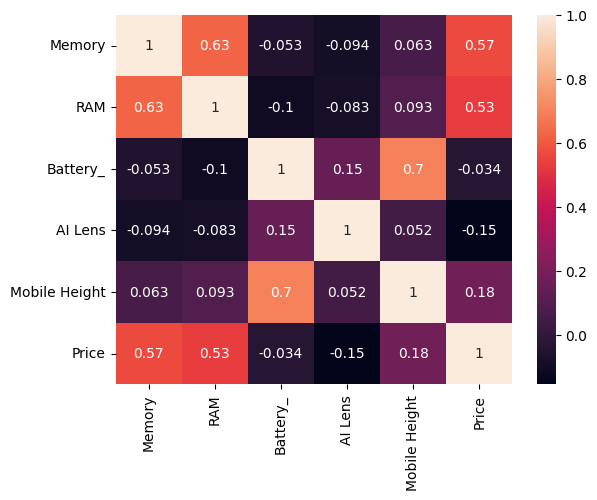

In [22]:
sns.heatmap(numerical_col.corr(),annot=True)

In [23]:
df['Battery_'].corr(df['Memory'])

-0.05321023663220388

In [24]:
#Label Encoding the Categorical Features
le=LabelEncoder()
for column in categorical_col:
  df_final[column]=le.fit_transform(df_final[column])


<Axes: >

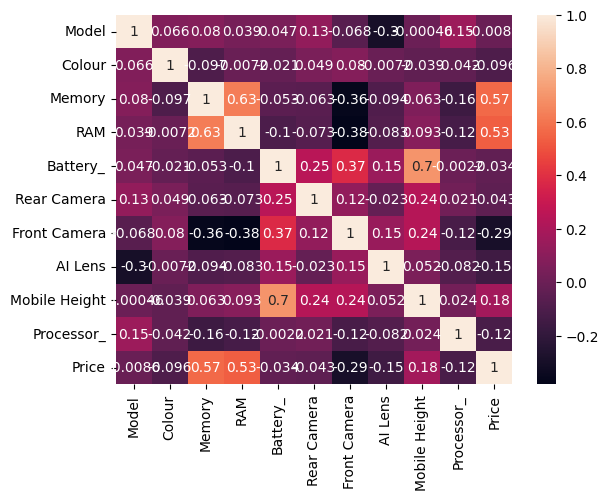

In [25]:
sns.heatmap(df_final.corr(),annot=True)

In [26]:
df_final.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
Model,1.000000,0.066469,0.079546,0.039078,0.046978,0.125517,-0.067923,-0.299453,-0.000457,0.153663,-0.008591
Colour,0.066469,1.000000,-0.097242,-0.007154,-0.021033,0.048796,0.079634,-0.007244,-0.039224,-0.041765,-0.095782
Memory,0.079546,-0.097242,1.000000,0.625284,-0.053210,-0.062725,-0.361646,-0.094442,0.063163,-0.155522,0.566660
RAM,0.039078,-0.007154,0.625284,1.000000,-0.104923,-0.073380,-0.381846,-0.082622,0.092951,-0.124870,0.532024
Battery_,0.046978,-0.021033,-0.053210,-0.104923,1.000000,0.245957,0.374791,0.150156,0.695641,-0.002150,-0.034297
Rear Camera,0.125517,0.048796,-0.062725,-0.073380,0.245957,1.000000,0.124321,-0.022927,0.235373,0.021044,-0.043153
Front Camera,-0.067923,0.079634,-0.361646,-0.381846,0.374791,0.124321,1.000000,0.146588,0.237274,-0.120970,-0.290620
AI Lens,-0.299453,-0.007244,-0.094442,-0.082622,0.150156,-0.022927,0.146588,1.000000,0.052018,-0.082015,-0.153691
Mobile Height,-0.000457,-0.039224,0.063163,0.092951,0.695641,0.235373,0.237274,0.052018,1.000000,0.023778,0.176009
Processor_,0.153663,-0.041765,-0.155522,-0.124870,-0.002150,0.021044,-0.120970,-0.082015,0.023778,1.000000,-0.115475


<Axes: xlabel='RAM', ylabel='Memory'>

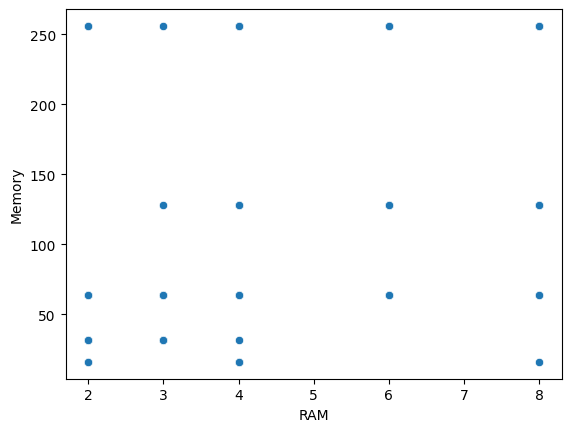

In [27]:
sns.scatterplot(y=df['Memory'],x=df['RAM'])

<Axes: xlabel='Memory', ylabel='Price'>

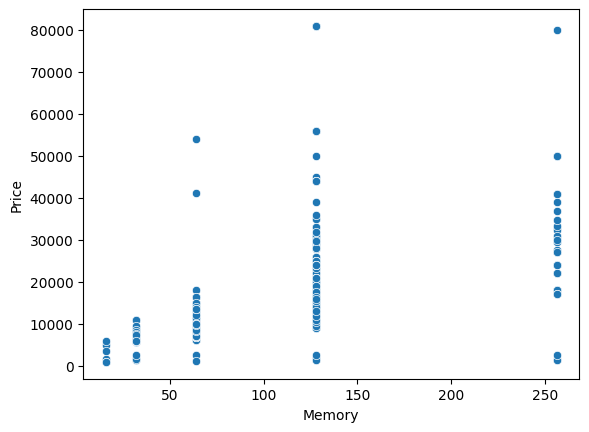

In [28]:
sns.scatterplot(x=df['Memory'],y=df['Price'])

<Axes: xlabel='RAM', ylabel='Price'>

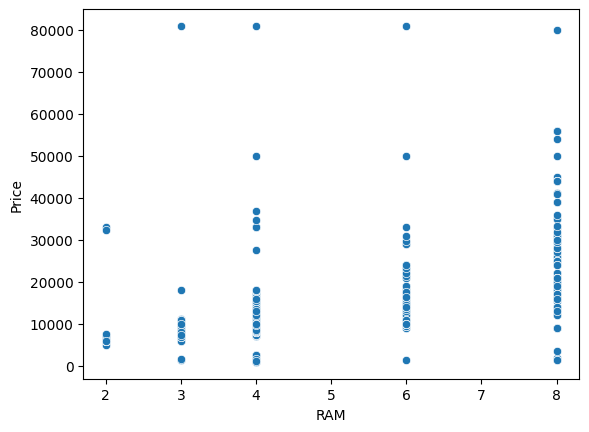

In [29]:
sns.scatterplot(x=df['RAM'],y=df['Price'])

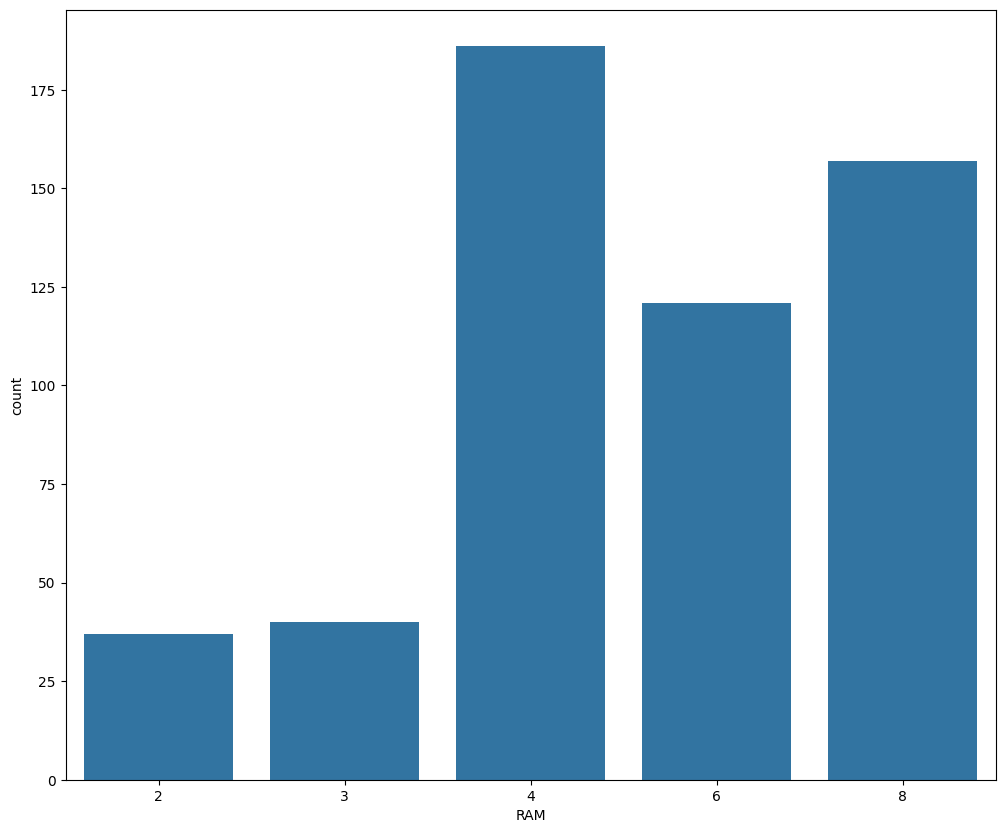

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['RAM'])
sns.set_style('darkgrid')

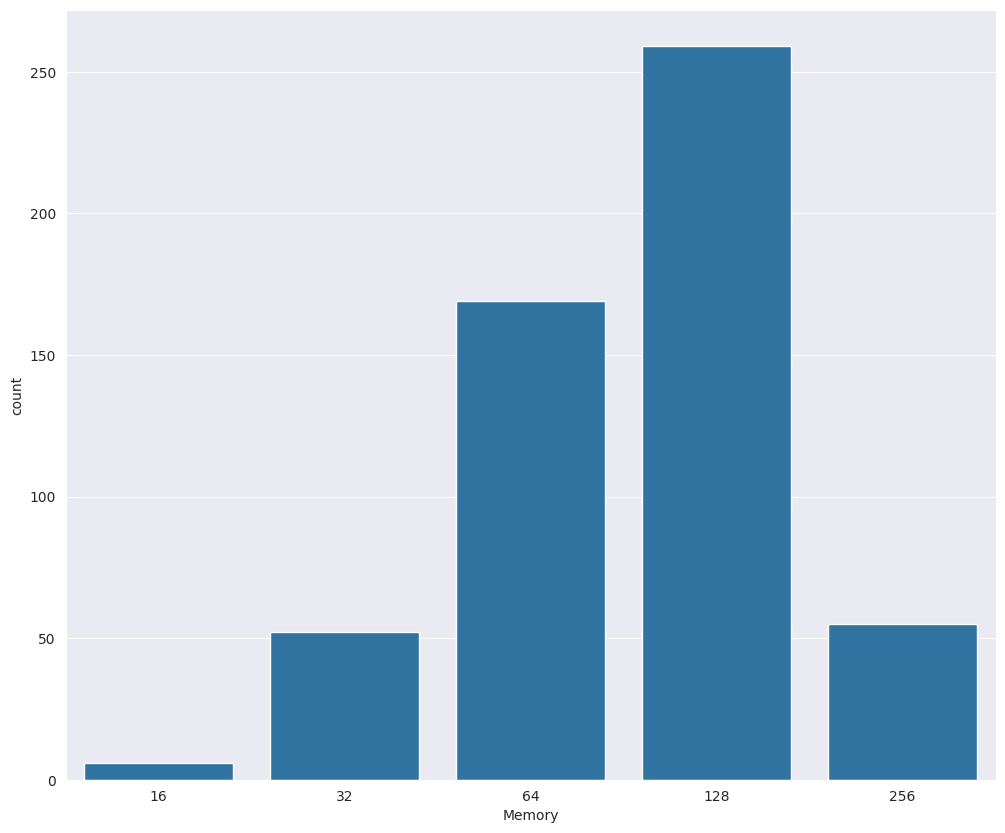

In [31]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Memory'])
sns.set_style('darkgrid')

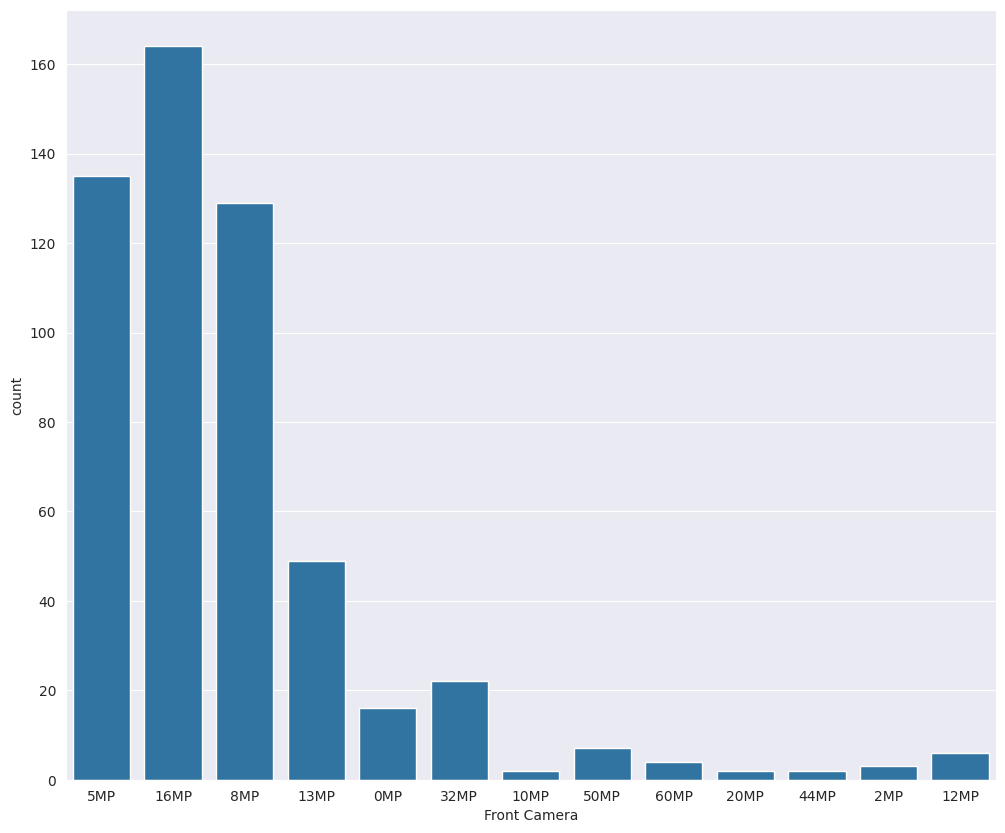

In [32]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Front Camera'])
sns.set_style('darkgrid')

<Axes: xlabel='Price'>

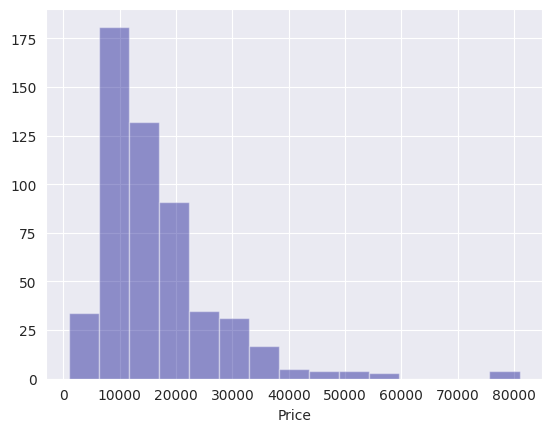

In [ ]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

<Axes: xlabel='Battery_', ylabel='Density'>

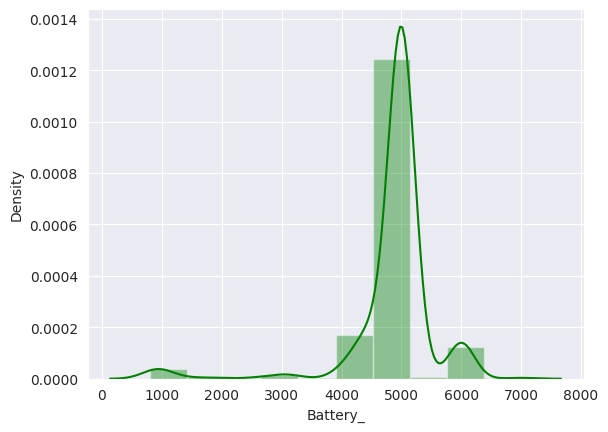

In [35]:
sns.distplot(df['Battery_'].dropna(),kde=True,color='green',bins=10)

In [ ]:
df_final

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,10,28,64,4,6000,3,7,1,16.76,64,7299
1,10,28,64,4,6000,3,7,1,16.76,64,7299
2,18,28,128,8,5000,7,3,0,16.64,45,11999
3,29,50,32,2,5000,10,7,0,16.56,33,5649
4,6,28,128,8,5000,7,7,1,16.76,8,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,16,28,256,8,3900,7,1,0,15.49,14,79999
537,16,28,32,2,3100,8,4,0,12.70,42,5998
538,16,58,64,4,5000,7,9,0,16.76,17,9990
539,52,28,128,8,5000,7,5,0,16.26,6,38999


**Feature Selection**

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
X = df_final.iloc[:,0:10] # Independent columns
y = df_final.iloc[:,[-1]]

In [38]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
0,10,28,64,4,6000,3,7,1,16.76,64
1,10,28,64,4,6000,3,7,1,16.76,64
2,18,28,128,8,5000,7,3,0,16.64,45
3,29,50,32,2,5000,10,7,0,16.56,33
4,6,28,128,8,5000,7,7,1,16.76,8
...,...,...,...,...,...,...,...,...,...,...
536,16,28,256,8,3900,7,1,0,15.49,14
537,16,28,32,2,3100,8,4,0,12.70,42
538,16,58,64,4,5000,7,9,0,16.76,17
539,52,28,128,8,5000,7,5,0,16.26,6


In [39]:
y

,Price
0,7299
1,7299
2,11999
3,5649
4,8999
...,...
536,79999
537,5998
538,9990
539,38999


In [41]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [42]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Model,4434.824602
1,Colour,768.170693
2,Memory,14126.732211
3,RAM,305.284365
4,Battery_,61410.920261
5,Rear Camera,339.381693
6,Front Camera,512.545959
7,AI Lens,212.897549
8,Mobile Height,144.142050
9,Processor_,3222.077329


In [43]:
print(featureScores.nlargest(4,'Score'))

        Specs         Score
4    Battery_  61410.920261
2      Memory  14126.732211
0       Model   4434.824602
9  Processor_   3222.077329


**Feature Importance**

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.1743818  0.07009991 0.07574734 0.10678742 0.07016811 0.0958379
 0.08010087 0.01591203 0.13709385 0.17387078]


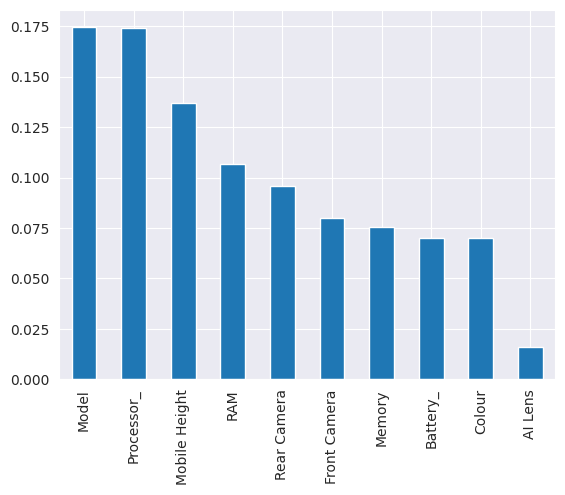

In [46]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [ ]:
df.groupby(['Memory','RAM','Model'])['Price'].mean().sort_values(ascending=False)

Memory  RAM  Model                
128     3    APPLE iPhone 14 Plus     80999.0
        4    APPLE iPhone 14 Plus     80999.0
        6    APPLE iPhone 14 Plus     80999.0
256     8    SAMSUNG Galaxy S23 5G    79999.0
128     8    Google Pixel 7           55999.0
                                       ...   
32      3    micromax                  1375.0
256     8    micromax 1                1299.0
             micromax 2                1299.0
64      4    micromax                  1199.0
16      4    redmi min                  920.0
Name: Price, Length: 283, dtype: float64

In [ ]:
df.sort_values('Price',ascending=False)
#Sorting Features based on Price

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
520,614,APPLE iPhone 14 Plus,Purple,128,3,4323,12MP,12MP,0,17.02,6 Core,80999
493,576,APPLE iPhone 14 Plus,Midnight,128,6,4323,12MP,12MP,0,17.02,IOS,80999
525,621,APPLE iPhone 14 Plus,Starlight,128,4,4323,12MP,12MP,0,17.02,ios,80999
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
416,452,Google Pixel 7,Snow,128,8,4270,50MP,8MP,0,16.00,Google Tensor G2,55999
...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,micromax 1,Eclipse Black,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
155,155,micromax 2,Nebula Green,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
250,250,micromax,Lake Blue,64,4,1500,0MP,0MP,0,6.10,Mediatek MT6261D,1199
247,247,redmi min,M3),16,4,1000,0MP,0MP,0,4.57,Spreadtrum,920


In [47]:
def find_skewness(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Calculate skewness for each numeric column
    skewness = df[numeric_columns].skew()

    # Print skewness for each column
    for col, skew_value in skewness.items():
        print(f'Skewness of {col}: {skew_value:.4f}')

    return skewness

In [48]:
find_skewness(df_final)

Skewness of Model: 0.4641
Skewness of Colour: 0.2490
Skewness of Memory: 1.0297
Skewness of RAM: 0.0676
Skewness of Battery_: -3.3042
Skewness of Rear Camera: -0.7500
Skewness of Front Camera: -0.0729
Skewness of AI Lens: 3.6126
Skewness of Mobile Height: 1.1718
Skewness of Processor_: 0.1859
Skewness of Price: 2.4256


,0
Model,0.464149
Colour,0.248955
Memory,1.029704
RAM,0.067617
Battery_,-3.304250
Rear Camera,-0.749997
Front Camera,-0.072900
AI Lens,3.612638
Mobile Height,1.171778
Processor_,0.185926


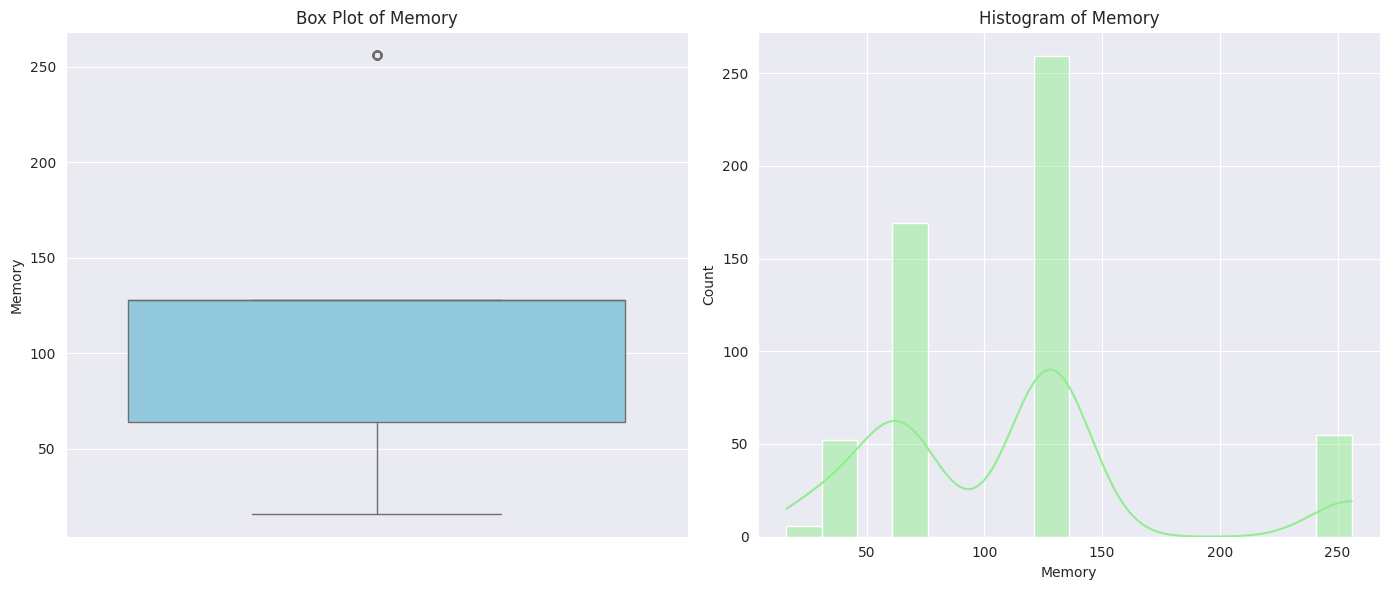

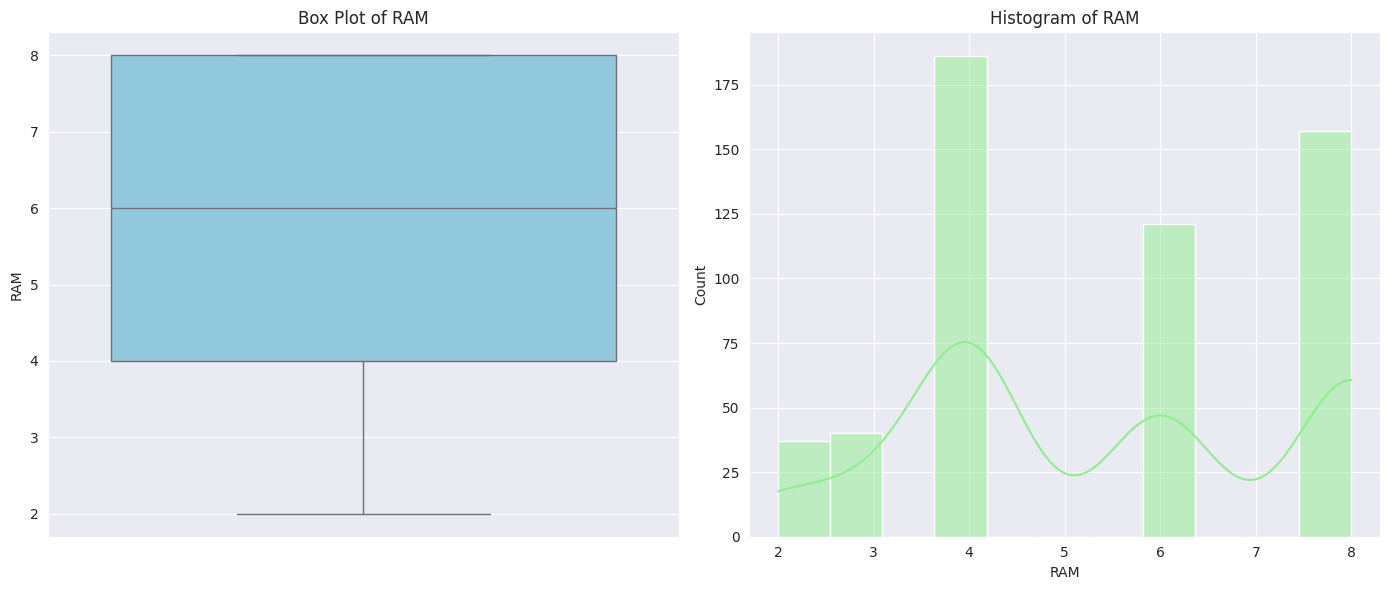

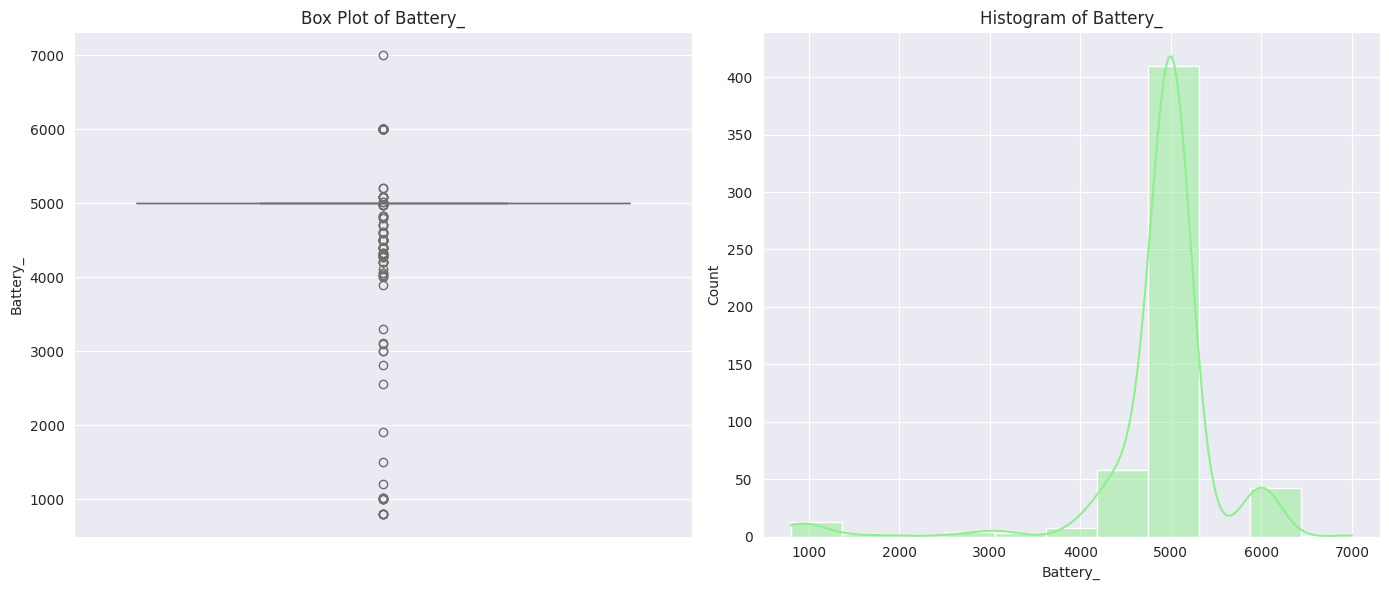

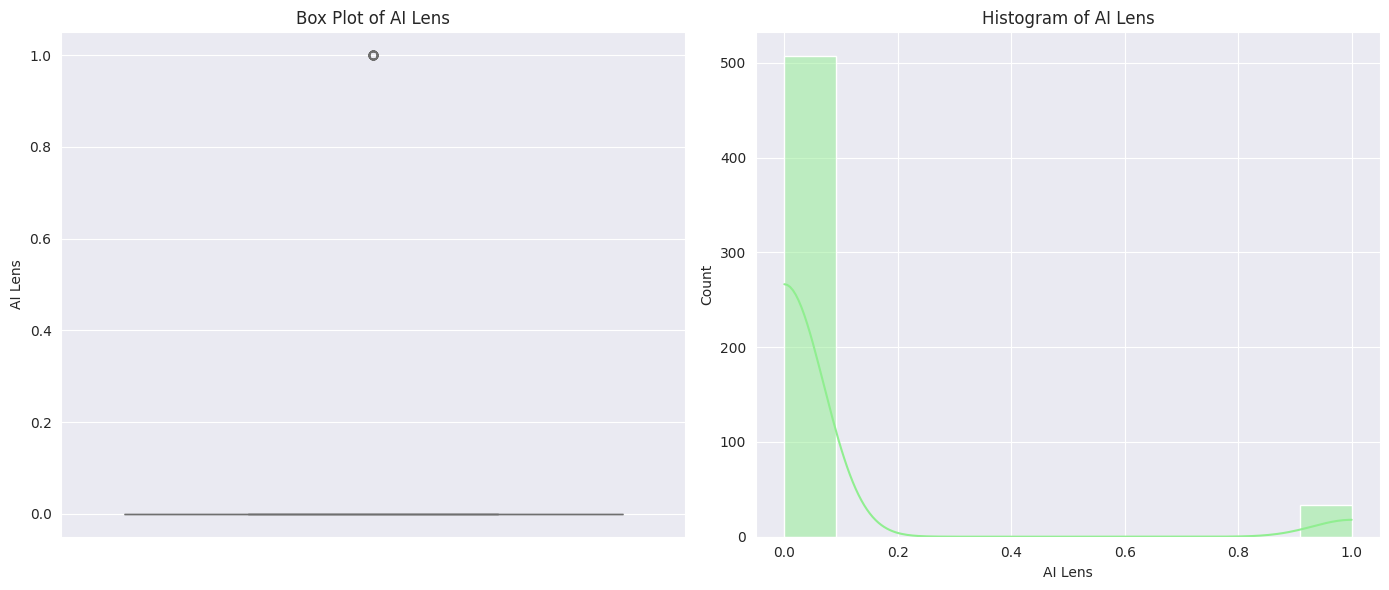

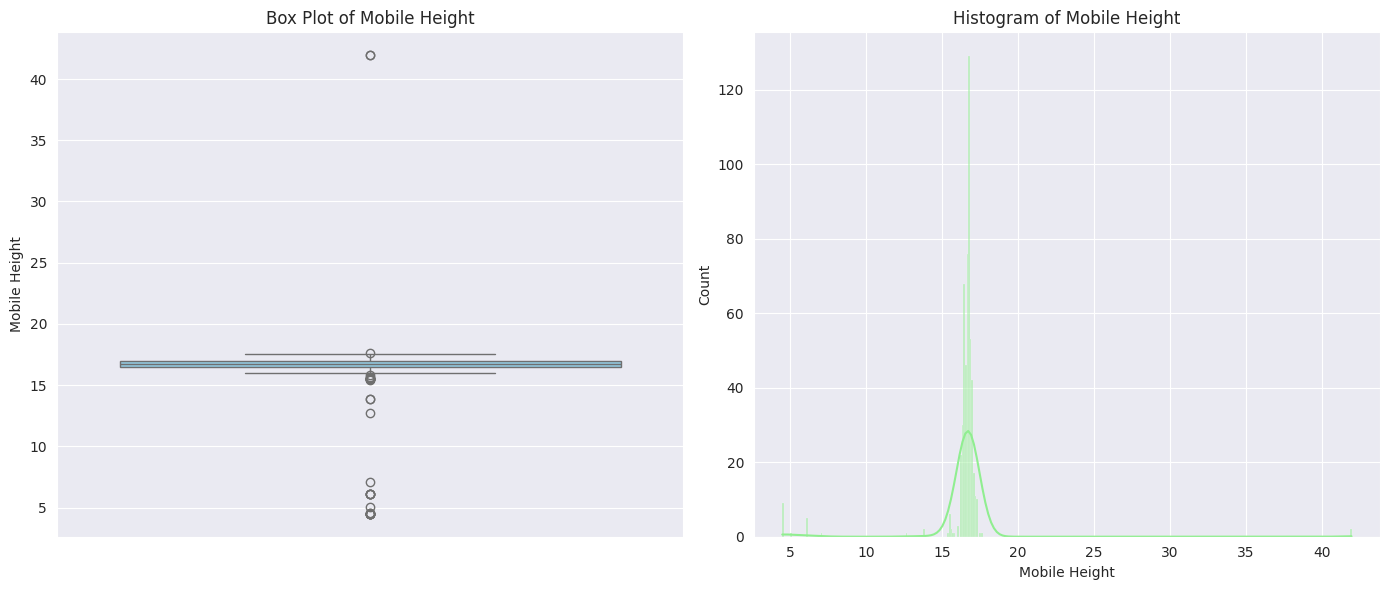

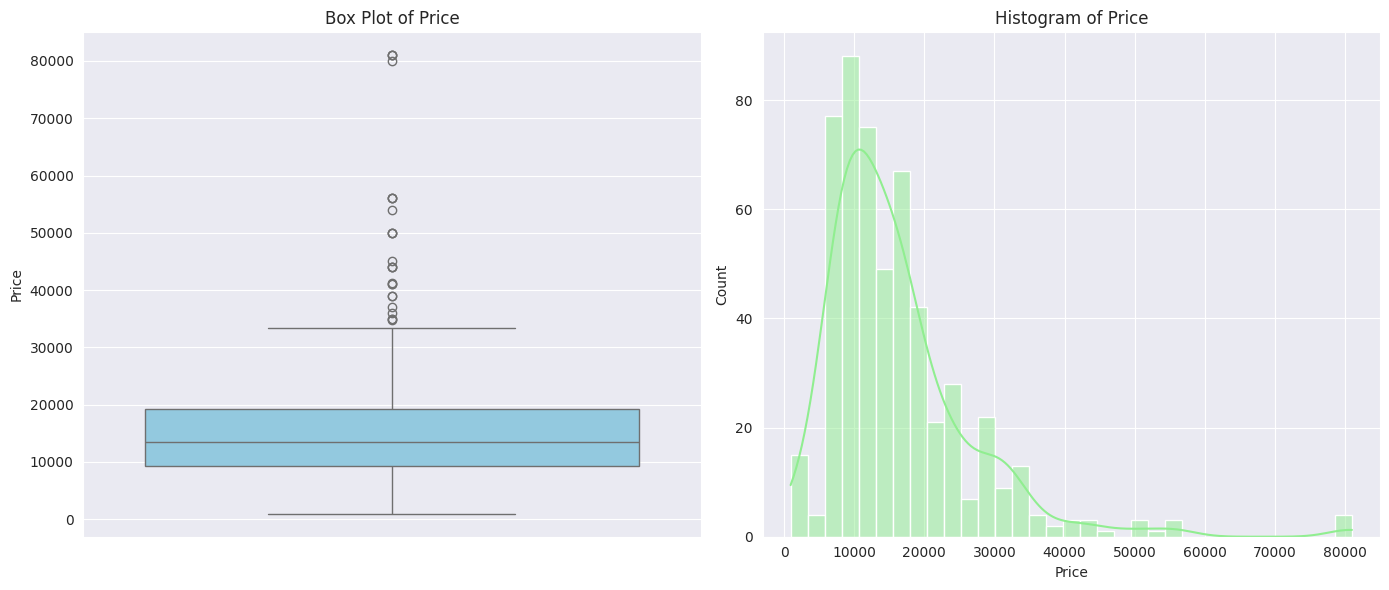

In [49]:

    for col in numerical_col:
        plt.figure(figsize=(14, 6))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df_final[col], color='skyblue')
        plt.title(f'Box Plot of {col}')

        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df_final[col], kde=True, color='lightgreen')
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()

        #Box Plot and HistPlot

In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    int64  
 1   Colour         541 non-null    int64  
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    int64  
 6   Front Camera   541 non-null    int64  
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    int64  
 10  Price          541 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 46.6 KB


In [51]:
df_final.describe()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,38.085028,28.898336,110.550832,5.397412,4871.587800,6.404806,5.467652,0.062847,16.431201,32.940850,16228.375231
std,24.870036,12.147505,60.600694,1.984923,780.148862,2.581396,2.813553,0.242911,2.523553,19.054314,10793.588322
min,0.000000,0.000000,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,0.000000,920.000000
25%,16.000000,28.000000,64.000000,4.000000,5000.000000,6.000000,3.000000,0.000000,16.510000,14.000000,9290.000000
50%,34.000000,28.000000,128.000000,6.000000,5000.000000,7.000000,7.000000,0.000000,16.710000,33.000000,13499.000000
75%,58.000000,28.000000,128.000000,8.000000,5000.000000,7.000000,8.000000,0.000000,16.940000,47.000000,19280.000000
max,88.000000,59.000000,256.000000,8.000000,7000.000000,11.000000,10.000000,1.000000,41.940000,70.000000,80999.000000


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
lr=LinearRegression()

In [56]:
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
y_predict=lr.predict(X_test)

In [58]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.314535259204032
4512.470979562527
94476093.10322902


In [59]:
#Training Score
print("Training Accuracy",lr.score(X_train,y_train))
#Testing Score
print("Testing Score",lr.score(X_test,y_test))

Training Accuracy 0.4404197037688825
Testing Score 0.314535259204032


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt=DecisionTreeRegressor()

In [62]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
y_predict=dt.predict(X_test)

In [64]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6701802314831328
1561.0825688073394
45458331.119266056


In [65]:
#Training Score
print("Training Accuracy",dt.score(X_train,y_train))
#Testing Score
print("Testing Score",dt.score(X_test,y_test))

Training Accuracy 0.9991704922816174
Testing Score 0.6701802314831328


In [66]:
from sklearn.svm import SVR
#Support Vector Regressor

In [67]:
sv=SVR()
sv.fit(X_train,y_train)

SVR()

In [68]:
y_predict=sv.predict(X_test)

In [69]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

-0.019440095212552633
6986.089000418016
140507179.45991877


In [70]:
#Training Score
print("Training Accuracy",sv.score(X_train,y_train))
#Testing Score
print("Testing Score",sv.score(X_test,y_test))

Training Accuracy -0.05096519980663161
Testing Score -0.019440095212552633


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lor=LogisticRegression()

In [73]:
lor.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_predict=lor.predict(X_test)

In [75]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.32244488861293064
4727.798165137615
93385926.33027522


In [76]:
#Training Score
print("Training Accuracy",lor.score(X_train,y_train))
#Testing Score
print("Testing Score",lor.score(X_test,y_test))

Training Accuracy 0.13657407407407407
Testing Score 0.12844036697247707


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
Rfr=RandomForestRegressor()

In [79]:
Rfr.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
y_predict=Rfr.predict(X_test)

In [81]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.7153593652356909
1846.6887629969413
39231390.77836177


In [82]:
#Training Score
print("Training Accuracy",Rfr.score(X_train,y_train))
#Testing Score
print("Testing Score",Rfr.score(X_test,y_test))

Training Accuracy 0.9774804501688349
Testing Score 0.7153593652356909


In [83]:
from xgboost import XGBRegressor

In [86]:
xgb=XGBRegressor(gamma=0.1)

In [87]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
y_predict=xgb.predict(X_test)

In [89]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.7564517531709765
1327.1139347181409
33567717.59817755


In [90]:
#Training Score
print("Training Accuracy",xgb.score(X_train,y_train))
#Testing Score
print("Testing Score",xgb.score(X_test,y_test))

Training Accuracy 0.9990871915401635
Testing Score 0.7564517531709765


In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
Adr=AdaBoostRegressor()

In [93]:
Adr.fit(X_train,y_train)

AdaBoostRegressor()

In [94]:
y_predict=Adr.predict(X_test)

In [95]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6468922367057468
4742.276509480476
48668064.06661063


In [96]:
#Training Score
print("Training Accuracy",Adr.score(X_train,y_train))
#Testing Score
print("Testing Score",Adr.score(X_test,y_test))

Training Accuracy 0.7760036475992839
Testing Score 0.6468922367057468


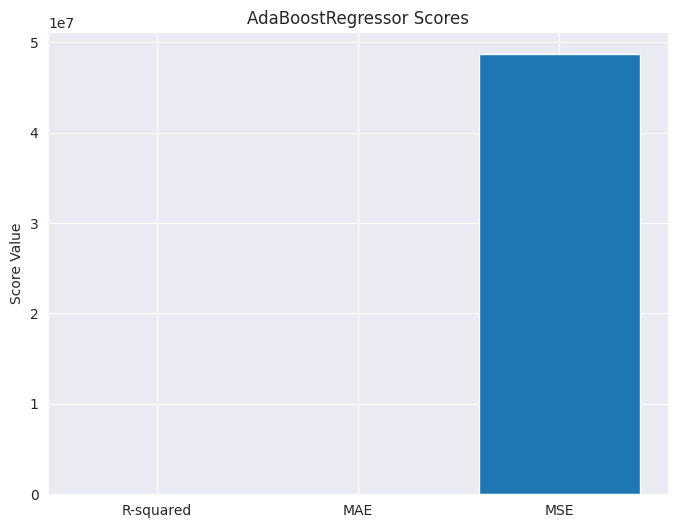

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the following scores from AdaBoostRegressor
r2 = 0.64  # Replace with your actual r2_score
mae = 4742.27  # Replace with your actual mean_absolute_error
mse = 48668064 # Replace with your actual mean_squared_error

# Create a matrix to store the scores
scores_matrix = np.array([[r2], [mae], [mse]])

# Create a bar plot
labels = ['R-squared', 'MAE', 'MSE']
plt.figure(figsize=(8, 6))
plt.bar(labels, scores_matrix.flatten())
plt.title('AdaBoostRegressor Scores')
plt.ylabel('Score Value')
plt.show()


In [98]:
import pandas as pd

# Assuming you have the following scores from different models
lr_r2 = 0.3145  # Replace with your actual r2_score
lr_mae = 4512.4709  # Replace with your actual mean_absolute_error
lr_mse = 94476093.1032 # Replace with your actual mean_squared_error

dt_r2 = 0.67018 # Replace with your actual r2_score
dt_mae = 1561.08256  # Replace with your actual mean_absolute_error
dt_mse = 45458331.1192 # Replace with your actual mean_squared_error

sv_r2 = -0.0194 # Replace with your actual r2_score
sv_mae = 6986.0890 # Replace with your actual mean_absolute_error
sv_mse = 140507179.4599 # Replace with your actual mean_squared_error

lor_r2 = 0.3224  # Replace with your actual r2_score
lor_mae = 4729.7981 # Replace with your actual mean_absolute_error
lor_mse = 93385926.33  # Replace with your actual mean_squared_error

rfr_r2 = 0.7153  # Replace with your actual r2_score
rfr_mae = 1846.688  # Replace with your actual mean_absolute_error
rfr_mse = 39231390.77 # Replace with your actual mean_squared_error

xgb_r2 = 0.756  # Replace with your actual r2_score
xgb_mae =1327.11  # Replace with your actual mean_absolute_error
xgb_mse = 33567717.59 # Replace with your actual mean_squared_error

adr_r2 = 0.64  # Replace with your actual r2_score
adr_mae = 4742 # Replace with your actual mean_absolute_error
adr_mse = 48668064 # Replace with your actual mean_squared_error

# Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'R-squared': [lr_r2, dt_r2, sv_r2, lor_r2, rfr_r2, xgb_r2, adr_r2],
    'MAE': [lr_mae, dt_mae, sv_mae, lor_mae, rfr_mae, xgb_mae, adr_mae],
    'MSE': [lr_mse, dt_mse, sv_mse, lor_mse, rfr_mse, xgb_mse, adr_mse]
}

# Create a pandas DataFrame
df_scores = pd.DataFrame(data)

# Display the table
print(df_scores)


                 Model  R-squared         MAE           MSE
0    Linear Regression    0.31450  4512.47090  9.447609e+07
1        Decision Tree    0.67018  1561.08256  4.545833e+07
2                  SVR   -0.01940  6986.08900  1.405072e+08
3  Logistic Regression    0.32240  4729.79810  9.338593e+07
4        Random Forest    0.71530  1846.68800  3.923139e+07
5              XGBoost    0.75600  1327.11000  3.356772e+07
6             AdaBoost    0.64000  4742.00000  4.866806e+07


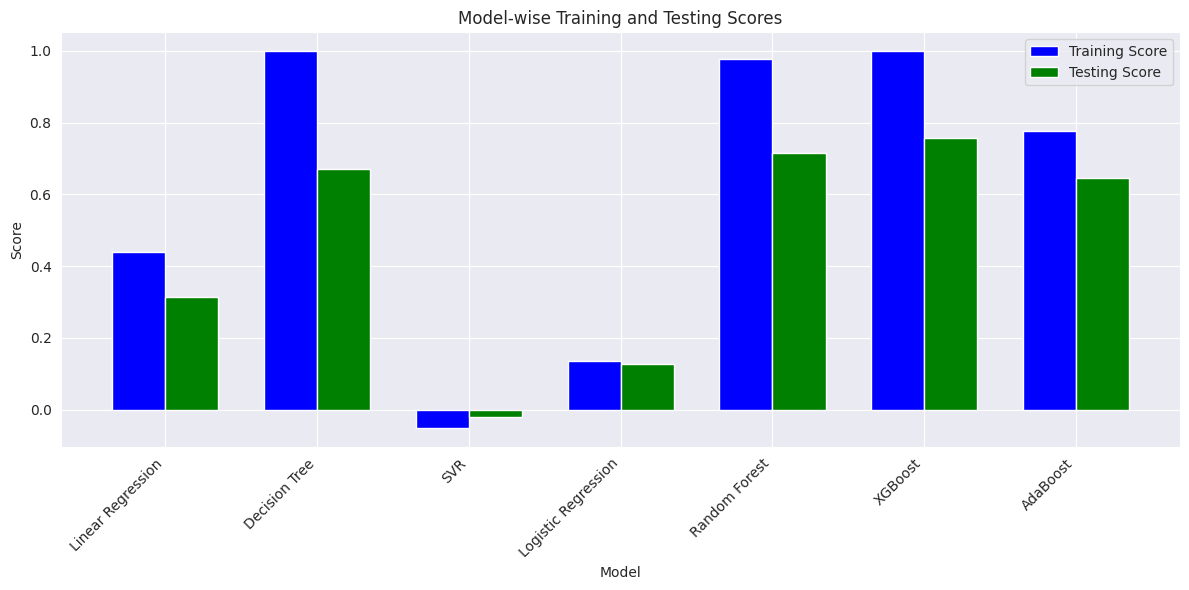

In [105]:
#Train Test Score Model wise bar Plotting

import matplotlib.pyplot as plt

# Assuming you have the following scores from different models
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)

sv_train_score = sv.score(X_train, y_train)
sv_test_score = sv.score(X_test, y_test)

lor_train_score = lor.score(X_train, y_train)
lor_test_score = lor.score(X_test, y_test)

rfr_train_score = Rfr.score(X_train, y_train)
rfr_test_score = Rfr.score(X_test, y_test)

xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

adr_train_score = Adr.score(X_train, y_train)
adr_test_score = Adr.score(X_test, y_test)

# Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'Training Score': [lr_train_score, dt_train_score, sv_train_score, lor_train_score, rfr_train_score, xgb_train_score, adr_train_score],
    'Testing Score': [lr_test_score, dt_test_score, sv_test_score, lor_test_score, rfr_test_score, xgb_test_score, adr_test_score]
}

# Create a pandas DataFrame
df_scores = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(df_scores))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, df_scores['Training Score'], color='blue', width=bar_width, label='Training Score')
plt.bar(r2, df_scores['Testing Score'], color='green', width=bar_width, label='Testing Score')

# Set the x-axis labels
plt.xticks([r + bar_width / 2 for r in range(len(df_scores))], df_scores['Model'], rotation=45, ha='right')

# Add a legend
plt.legend()

# Add a title and labels
plt.title('Model-wise Training and Testing Scores')
plt.xlabel('Model')
plt.ylabel('Score')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# prompt: cross validation

# Separate features (X) and target variable (y)
X = df_final.drop('Price', axis=1)
y = df_final['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TabularDataset from the training data
train_data = TabularDataset(X_train.assign(target=y_train))

# Define the predictor with desired settings
predictor = TabularPredictor(label='target', eval_metric='rmse')

# Train the model with cross-validation
predictor.fit(train_data, presets=['best_quality'])

# Evaluate the model on the test data
predictions = predictor.predict(X_test)
print(predictor.evaluate(X_test, y_test))


No path specified. Models will be saved in: "AutogluonModels/ag-20240909_070358"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.79 GB / 12.67 GB (85.1%)
Disk Space Avail:   74.44 GB / 107.72 GB (69.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=17808) [1000]	valid_set's rmse: 3066.17


(_ray_fit pid=17907) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=17907) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=17907)  [repeated 4x across cluster]
(_ray_fit pid=17907) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=17907) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=17907)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=17909) [1000]	valid_set's rmse: 6298.54 [repeated 20x across cluster]


(_ray_fit pid=18035) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=18035) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=18035)  [repeated 4x across cluster]
(_ray_fit pid=18035) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=18035) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=18035)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=18035) [1000]	valid_set's rmse: 2677.44 [repeated 19x across cluster]


(_ray_fit pid=18139) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=18139) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=18139)  [repeated 4x across cluster]
(_ray_fit pid=18139) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=18139) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=18139)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=18139) [1000]	valid_set's rmse: 7504.91 [repeated 18x across cluster]


(_dystack pid=17665) 	-4614.951	 = Validation score   (-root_mean_squared_error)
(_dystack pid=17665) 	48.16s	 = Training   runtime
(_dystack pid=17665) 	0.89s	 = Validation runtime
(_dystack pid=17665) Fitting model: LightGBM_BAG_L1 ... Training model for up to 535.0s of the 832.24s of remaining time.
(_dystack pid=17665) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.02%)
(_ray_fit pid=18173) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=18173) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=18173)  [repeated 2x across cluster]
(_ray_fit pid=18173) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=18173) This will raise in a future version.
(_ray_fit pid=18173)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=18244) /usr/local/lib/python3.10/dist-packages/dask/dat

(_ray_fit pid=18244) [1000]	valid_set's rmse: 1820.36 [repeated 17x across cluster]


(_ray_fit pid=18353) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=18353) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=18353) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=18353) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=18353)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=18353)  [repeated 2x across cluster]


(_ray_fit pid=18353) [1000]	valid_set's rmse: 5389.38 [repeated 20x across cluster]


(_ray_fit pid=18439) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=18439) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=18439) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=18439) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=18439)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=18439)  [repeated 4x across cluster]


(_ray_fit pid=18439) [1000]	valid_set's rmse: 1551.74 [repeated 12x across cluster]


(_ray_fit pid=18490) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=18490) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=18490) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=18490) This will raise in a future version.
(_ray_fit pid=18490)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=18490)  [repeated 2x across cluster]


(_ray_fit pid=18490) [1000]	valid_set's rmse: 3132.08 [repeated 10x across cluster]


(_ray_fit pid=18551) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=18551) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=18551) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=18551) This will raise in a future version.
(_ray_fit pid=18551)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=18551)  [repeated 2x across cluster]


(_ray_fit pid=18551) [1000]	valid_set's rmse: 5605.04 [repeated 4x across cluster]


(_dystack pid=17665) 	-4142.5437	 = Validation score   (-root_mean_squared_error)
(_dystack pid=17665) 	41.19s	 = Training   runtime
(_dystack pid=17665) 	0.75s	 = Validation runtime
(_dystack pid=17665) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 489.38s of the 786.62s of remaining time.
(_ray_fit pid=18580) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=18580) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=18580) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=18580) This will raise in a future version.
(_ray_fit pid=18580)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=18580)  [repeated 2x across cluster]
(_dystack pid=17665) 	-4432.3877	 = Validation score   (-root_mean_squared_error)
(_dystack pid=17665) 	1.63s	 = Training   runtime
(_dystack pid=17665) 	0.12s	 = Validation runtime
(_dystack pid=17665) Fitting mod

(_ray_fit pid=20158) [1000]	valid_set's rmse: 4862.69 [repeated 7x across cluster]


(_ray_fit pid=20262) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=20262) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=20262)  [repeated 4x across cluster]
(_ray_fit pid=20262) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=20262) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=20262)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=20345) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=20345) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=20345)  [repeated 4x across cluster]
(_ray_fit pid=20345) You can install it with `pip install dask[dat

(_ray_fit pid=21021) [1000]	valid_set's rmse: 2990.94 [repeated 5x across cluster]


(_ray_fit pid=21135) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=21135) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=21135)  [repeated 4x across cluster]
(_ray_fit pid=21135) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=21135) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=21135)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=21135) [1000]	valid_set's rmse: 3586 [repeated 20x across cluster]


(_ray_fit pid=21254) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=21254) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=21254)  [repeated 4x across cluster]
(_ray_fit pid=21254) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=21254) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=21254)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=21254) [1000]	valid_set's rmse: 1656.89 [repeated 20x across cluster]


(_ray_fit pid=21341) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=21341) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=21341)  [repeated 4x across cluster]
(_ray_fit pid=21341) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=21341) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=21341)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=21341) [1000]	valid_set's rmse: 6739.44 [repeated 13x across cluster]


(_ray_fit pid=21405) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=21405) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=21405)  [repeated 2x across cluster]
(_ray_fit pid=21405) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=21405) This will raise in a future version.
(_ray_fit pid=21405)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=21405) [1000]	valid_set's rmse: 1794.38 [repeated 4x across cluster]


(_dystack pid=17665) 	-4677.0129	 = Validation score   (-root_mean_squared_error)
(_dystack pid=17665) 	50.0s	 = Training   runtime
(_dystack pid=17665) 	1.5s	 = Validation runtime
(_dystack pid=17665) Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 165.47s of the 462.71s of remaining time.
(_dystack pid=17665) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.00%)
(_ray_fit pid=21459) /usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the 

(_ray_fit pid=22008) [1000]	valid_set's rmse: 13631.6 [repeated 4x across cluster]


(_ray_fit pid=22113) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=22113) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=22113) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=22113) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=22113)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=22113)  [repeated 4x across cluster]


(_ray_fit pid=22113) [1000]	valid_set's rmse: 5440.81 [repeated 20x across cluster]


(_ray_fit pid=22205) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=22205) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=22205) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=22205) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=22205)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=22205)  [repeated 4x across cluster]


(_ray_fit pid=22205) [1000]	valid_set's rmse: 5448.57 [repeated 11x across cluster]


(_ray_fit pid=22315) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=22315) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=22315) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=22315) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=22315)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=22315)  [repeated 4x across cluster]


(_ray_fit pid=22315) [1000]	valid_set's rmse: 9881.08 [repeated 20x across cluster]


(_dystack pid=17665) 	-7501.7062	 = Validation score   (-root_mean_squared_error)
(_dystack pid=17665) 	41.17s	 = Training   runtime
(_dystack pid=17665) 	0.87s	 = Validation runtime
(_dystack pid=17665) Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 56.25s of the 353.49s of remaining time.
(_dystack pid=17665) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.00%)
(_ray_fit pid=22418) /usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/torch/tabular_nn_torch.py:411: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`

(_ray_fit pid=23203) [1000]	valid_set's rmse: 4978.12 [repeated 14x across cluster]


(_ray_fit pid=23319) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=23319) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=23319)  [repeated 4x across cluster]
(_ray_fit pid=23319) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=23319) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=23319)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=23319) [1000]	valid_set's rmse: 3215.14 [repeated 5x across cluster]
(_ray_fit pid=23360) [7000]	valid_set's rmse: 4867.36 [repeated 7x across cluster]


(_dystack pid=17665) 	-3592.9497	 = Validation score   (-root_mean_squared_error)
(_dystack pid=17665) 	49.65s	 = Training   runtime
(_dystack pid=17665) 	0.12s	 = Validation runtime
(_dystack pid=17665) Fitting model: LightGBM_BAG_L2 ... Training model for up to 211.78s of the 211.64s of remaining time.
(_dystack pid=17665) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.05%)
(_ray_fit pid=23360) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=23360) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=23360)  [repeated 2x across cluster]
(_ray_fit pid=23360) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=23360) This will raise in a future version.
(_ray_fit pid=23360)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=23431) /usr/local/lib/python3.10/dist-packages/dask/d

KeyboardInterrupt: 

In [ ]:
%%time

p = TabularPredictor(label='Price',
                            eval_metric='rmse',
                            problem_type='regression').fit(df,
                                                       presets='best_quality',
                                                        time_limit=3600*4,
                                                       excluded_model_types=['KNN','NN_TORCH'],
                                                       ag_args_fit={'num_gpus': 0}
                                                      )

No path specified. Models will be saved in: "AutogluonModels/ag-20240903_155143"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.27 GB / 12.67 GB (81.0%)
Disk Space Avail:   74.23 GB / 107.72 GB (68.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

CPU times: user 1min 45s, sys: 2.5 s, total: 1min 48s
Wall time: 3min 15s


In [ ]:
p.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTrees_r42_BAG_L2,-2952.276038,root_mean_squared_error,2.389174,17.635792,0.126177,1.269423,2,True,20
1,WeightedEnsemble_L3,-2952.276038,root_mean_squared_error,2.389939,17.674397,0.000766,0.038605,3,True,34
2,ExtraTrees_r197_BAG_L2,-3020.863781,root_mean_squared_error,2.382777,17.421962,0.119781,1.055593,2,True,31
3,ExtraTreesMSE_BAG_L2,-3020.863781,root_mean_squared_error,2.475887,17.347214,0.212891,0.980845,2,True,19
4,RandomForest_r16_BAG_L2,-3035.353929,root_mean_squared_error,2.385175,18.687670,0.122179,2.321301,2,True,32
5,RandomForestMSE_BAG_L2,-3035.353929,root_mean_squared_error,2.388291,18.559229,0.125294,2.192860,2,True,18
6,ExtraTrees_r49_BAG_L2,-3038.769553,root_mean_squared_error,2.402819,17.441298,0.139822,1.074929,2,True,24
7,RandomForest_r39_BAG_L2,-3056.495820,root_mean_squared_error,2.484671,18.722430,0.221675,2.356061,2,True,23
8,RandomForest_r195_BAG_L2,-3070.497446,root_mean_squared_error,2.385296,18.228150,0.122299,1.861782,2,True,21
9,RandomForest_r166_BAG_L2,-3085.193115,root_mean_squared_error,2.478039,17.624262,0.215043,1.257893,2,True,29
